In [1]:
import csv as csv
import numpy as np

csv_file_obj = csv.reader(open('data/train.csv','rb'))
header = csv_file_obj.next()

data=[]
for row in csv_file_obj:
    data.append(row)
data = np.array(data)

In [2]:
print data

[['1' '0' '3' ..., '7.25' '' 'S']
 ['2' '1' '1' ..., '71.2833' 'C85' 'C']
 ['3' '1' '3' ..., '7.925' '' 'S']
 ..., 
 ['889' '0' '3' ..., '23.45' '' 'S']
 ['890' '1' '1' ..., '30' 'C148' 'C']
 ['891' '0' '3' ..., '7.75' '' 'Q']]


In [4]:
type(data[:15,5])

numpy.ndarray

In [5]:
# try to take the mean of passenger ages
ages_onboard = data[:15,5].astype(np.float)

ValueError: could not convert string to float: 

<h2>The above command will fail because of missing values...the conversion is fine converting str '12' into float 12 but cant turn str '' into any kind of float</h2>

In [7]:
# using pandas to clean the data
import pandas as pd
import numpy as np

df = pd.read_csv('data/train.csv',header=0)

In [9]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [10]:
df.tail(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [11]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [13]:
df.info()
# this will show that cabin, age, and embarked all have some null values!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [14]:
df.describe()

//anaconda/envs/data/lib/python2.7/site-packages/numpy/lib/function_base.py:3823: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<h1>Data Munging!</h1>

In [15]:
df[['Sex','Pclass','Age']]

,Sex,Pclass,Age
0,male,3,22.0
1,female,1,38.0
2,female,3,26.0
3,female,1,35.0
4,male,3,35.0
5,male,3,NaN
6,male,1,54.0
7,male,3,2.0
8,female,3,27.0
9,female,2,14.0


In [16]:
#filtering data
df[df['Age'] > 60]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
170,171,0,1,"Van der hoef, Mr. Wyckoff",male,61.0,0,0,111240,33.5000,B19,S
252,253,0,1,"Stead, Mr. William Thomas",male,62.0,0,0,113514,26.5500,C87,S
275,276,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S
280,281,0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,NaN,Q
326,327,0,3,"Nysveen, Mr. Johan Hansen",male,61.0,0,0,345364,6.2375,NaN,S
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S


In [17]:
# mix of gender and class of the older group
df[df['Age'] > 60][['Sex','Pclass','Age','Survived']]

,Sex,Pclass,Age,Survived
33,male,2,66.0,0
54,male,1,65.0,0
96,male,1,71.0,0
116,male,3,70.5,0
170,male,1,61.0,0
252,male,1,62.0,0
275,female,1,63.0,1
280,male,3,65.0,0
326,male,3,61.0,0
438,male,1,64.0,0


In [18]:
# lets check out the missing data for age
df[df['Age'].isnull()][['Sex','Pclass','Age','Survived']]

,Sex,Pclass,Age,Survived
5,male,3,NaN,0
17,male,2,NaN,1
19,female,3,NaN,1
26,male,3,NaN,0
28,female,3,NaN,1
29,male,3,NaN,0
31,female,1,NaN,1
32,female,3,NaN,1
36,male,3,NaN,1
42,male,3,NaN,0


In [19]:
# get a count of males in each class
for i in range(1,4):
    print i, len(df[(df['Sex'] == 'male') & (df['Pclass'] == i)])

1 122
2 108
3 347


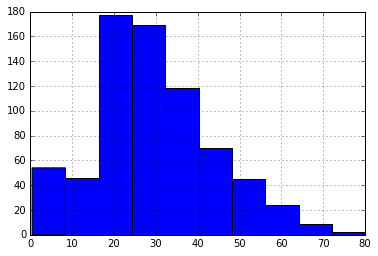

In [21]:
# and some graphs
import pylab as P
%matplotlib inline
df['Age'].hist()
P.show()

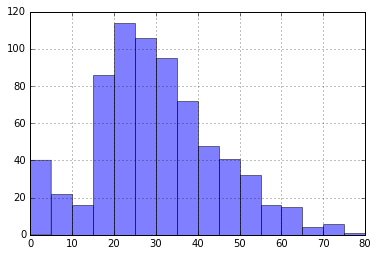

In [22]:
df['Age'].dropna().hist(bins=16,range=(0,80),alpha=0.5)
P.show()

<h2>Cleaning the data</h2>

In [23]:
# make a gender column with female=0 and male=1
df['Gender'] = df['Sex'].map({'female':0,'male':1}).astype(int)

In [24]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0


In [26]:
# deal with the missing values of Age
# fill in each value according to the median age of the people in that class
median_ages = np.zeros((2,3))
for i in range(0,2): # gender
    for j in range(0,3): # class
        # grab the entries in the data frame where gender = i and class = j, and then take the median and add it to 
        # the median ages reference table
        median_ages[i,j] = df[(df['Gender'] == i) & (df['Pclass'] == j+1)]['Age'].dropna().median() 

median_ages

array([[ 35. ,  28. ,  21.5],
       [ 40. ,  30. ,  25. ]])

In [27]:
# create a new column so as not to contaminate the original data too badly
df['AgeFill'] = df['Age']
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender,AgeFill
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,26.0


In [28]:
df[df['Age'].isnull()][['Gender','Pclass','Age','AgeFill']].head(10)

,Gender,Pclass,Age,AgeFill
5,1,3,NaN,NaN
17,1,2,NaN,NaN
19,0,3,NaN,NaN
26,1,3,NaN,NaN
28,0,3,NaN,NaN
29,1,3,NaN,NaN
31,0,1,NaN,NaN
32,0,3,NaN,NaN
36,1,3,NaN,NaN
42,1,3,NaN,NaN


In [29]:
for i in range(0,2): # loop through gender 
    for j in range(0,3): # loop through class
        df.loc[(df.Age.isnull()) & (df.Gender == i) & (df.Pclass == j+1),'AgeFill'] = median_ages[i,j]

In [30]:
df[df['Age'].isnull()][['Gender','Pclass','Age','AgeFill']].head(10)

,Gender,Pclass,Age,AgeFill
5,1,3,NaN,25.0
17,1,2,NaN,30.0
19,0,3,NaN,21.5
26,1,3,NaN,25.0
28,0,3,NaN,21.5
29,1,3,NaN,25.0
31,0,1,NaN,35.0
32,0,3,NaN,21.5
36,1,3,NaN,25.0
42,1,3,NaN,25.0


In [31]:
# also make a column that will tell us if the age was originally missing or not
df['AgeIsNull'] = pd.isnull(df.Age).astype(int)

In [32]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Gender,AgeFill,AgeIsNull
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.647587,29.112424,0.198653
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.477990,13.304424,0.399210
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.420000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400,0.000000,21.500000,0.000000
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200,1.000000,26.000000,0.000000
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000,1.000000,36.000000,0.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,80.000000,1.000000


<h1>Feature Engineering</h1>

In [33]:
# create a family size feature that is the sum of Parch (# of parents or children onboard) and SibSp (# siblings or spouses)
df['FamilySize'] = df['SibSp'] + df['Parch']

In [34]:
# artificial features, could combine class and age...by multiplying them we put a huge emphasis on third class 
# also look at gender and class as some kind of multiple, will always give 0 for women though, so maybe change that
df['Age*Class'] = df.AgeFill * df.Pclass

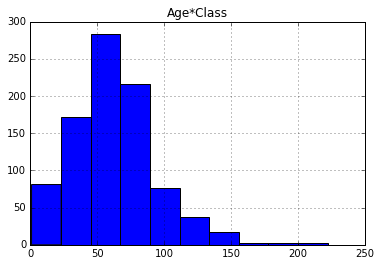

In [37]:
df[['Age*Class']].hist()
P.show()

<h1>Final Preparation</h1>

In [38]:
# ML generally doesnt work on strings (more complicated areas of study do though) but also need the data
# to be in an array, not pandas dataframe, for sklearn

#find out what is a string
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Gender           int64
AgeFill        float64
AgeIsNull        int64
FamilySize       int64
Age*Class      float64
dtype: object

In [39]:
df.dtypes[df.dtypes.map(lambda x: x=='object')]

Name        object
Sex         object
Ticket      object
Cabin       object
Embarked    object
dtype: object

In [40]:
# drop columns we won't use
df = df.drop(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked','Age'], axis=1)

In [41]:
# drop rows that still have missing values
df = df.dropna()

In [43]:
df.describe()

,PassengerId,Survived,Pclass,SibSp,Parch,Fare,Gender,AgeFill,AgeIsNull,FamilySize,Age*Class
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.523008,0.381594,32.204208,0.647587,29.112424,0.198653,0.904602,62.614860
std,257.353842,0.486592,0.836071,1.102743,0.806057,49.693429,0.477990,13.304424,0.399210,1.613459,31.362024
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.420000,0.000000,0.000000,0.920000
25%,223.500000,0.000000,2.000000,0.000000,0.000000,7.910400,0.000000,21.500000,0.000000,0.000000,40.000000
50%,446.000000,0.000000,3.000000,0.000000,0.000000,14.454200,1.000000,26.000000,0.000000,0.000000,63.000000
75%,668.500000,1.000000,3.000000,1.000000,0.000000,31.000000,1.000000,36.000000,0.000000,1.000000,75.000000
max,891.000000,1.000000,3.000000,8.000000,6.000000,512.329200,1.000000,80.000000,1.000000,10.000000,222.000000


In [44]:
# convert to numpy array
train_data = df.values

In [46]:
np.savetxt('data/clean_train.csv',train_data,delimiter=",")